In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Chait\OneDrive\Desktop\ad\Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.shape

(440, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [8]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

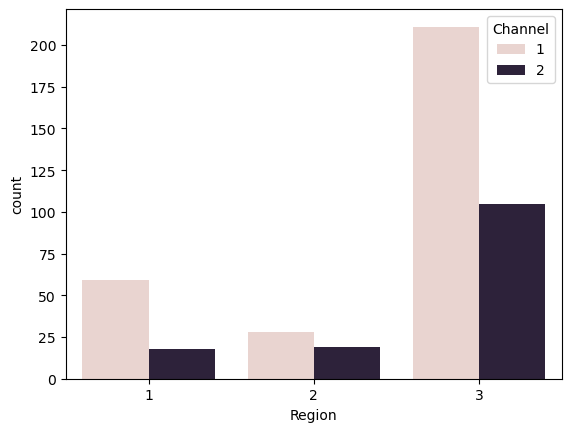

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Region',hue='Channel',data=df)
plt.show()

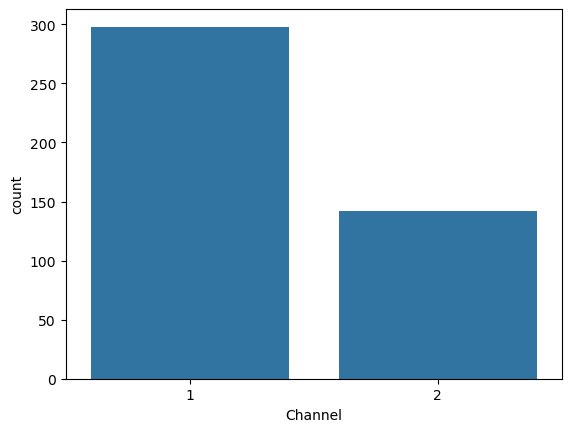

In [10]:
sns.countplot(x='Channel',data=df)
plt.show()

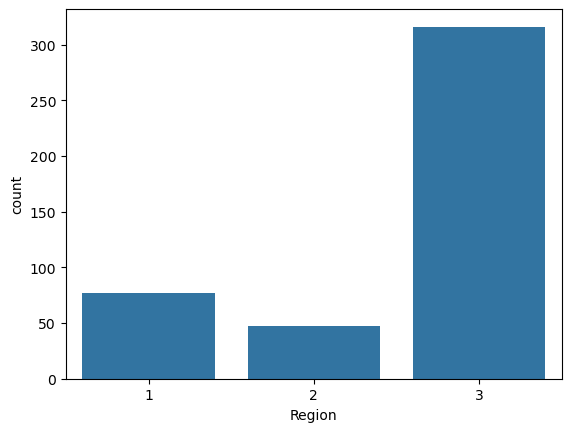

In [11]:
sns.countplot(x='Region',data=df)
plt.show()

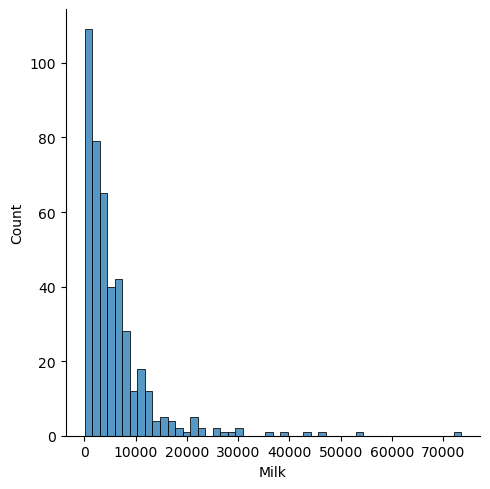

In [12]:
sns.displot(df['Milk'])
plt.show()

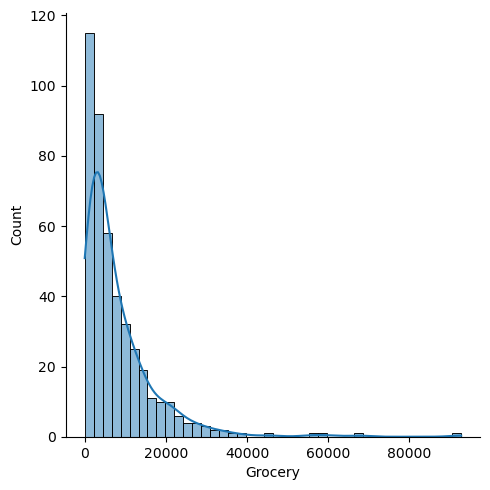

In [13]:
sns.displot(df['Grocery'], kde=True)
plt.show()


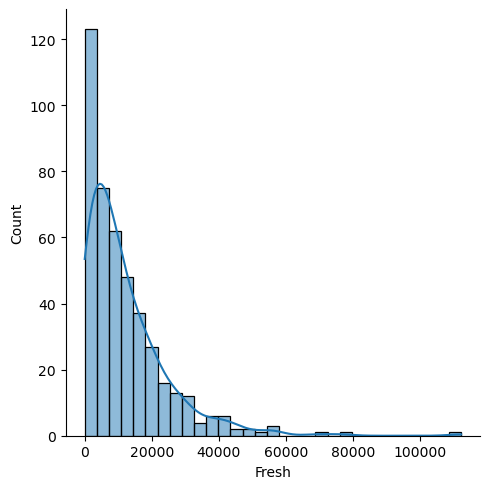

In [14]:
sns.displot(df['Fresh'], kde=True)
plt.show()


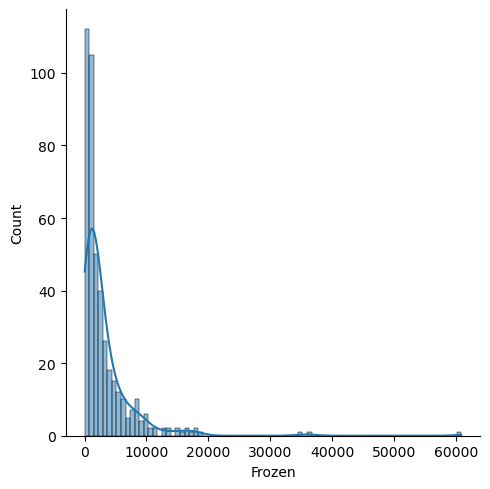

In [15]:
sns.displot(df['Frozen'], kde=True)
plt.show()

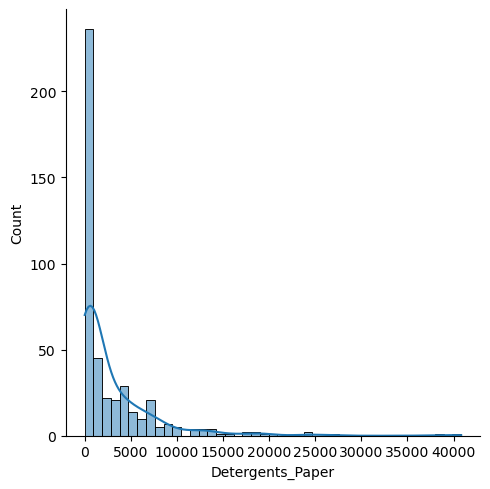

In [16]:
sns.displot(df['Detergents_Paper'], kde=True)
plt.show()


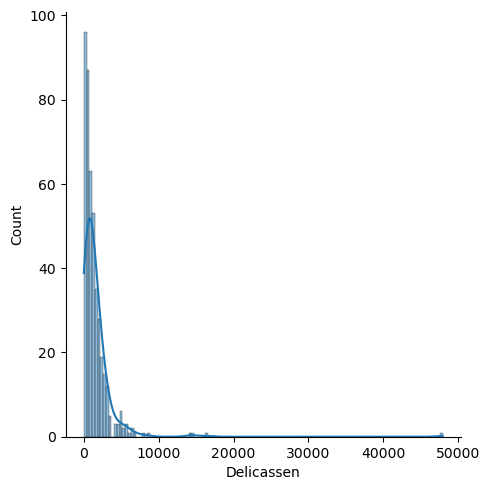

In [17]:
sns.displot(df['Delicassen'], kde=True)
plt.show()


In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

print(scaled_data)


[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [19]:
from sklearn .preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [20]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

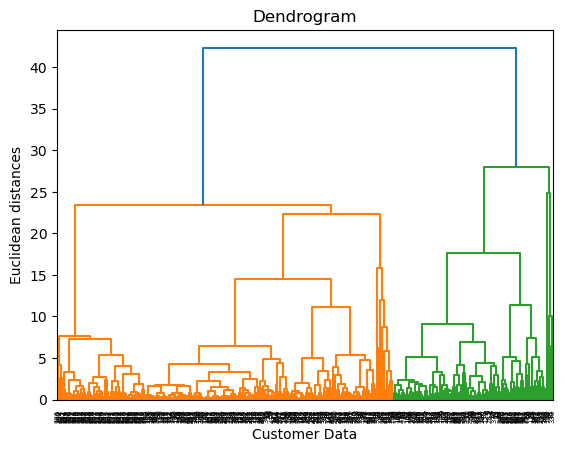

In [21]:
import scipy.cluster.hierarchy as sch

dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Data')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
len(set(dendo['color_list']))

3

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [32]:
cluster

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [33]:
cluster.shape

(440,)

In [34]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)


0.3600234023958461

In [38]:
cluster.shape

(440,)

#KMeans

In [41]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [43]:
from sklearn.cluster import KMeans

wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [44]:
wcss

[2600.3756482224417,
 2149.283956221759,
 1851.8408722743848,
 1567.4493550056047,
 1446.4349586356464,
 1189.4373315150992,
 1146.3938222781735,
 1082.6398816370167,
 969.1934595642861]

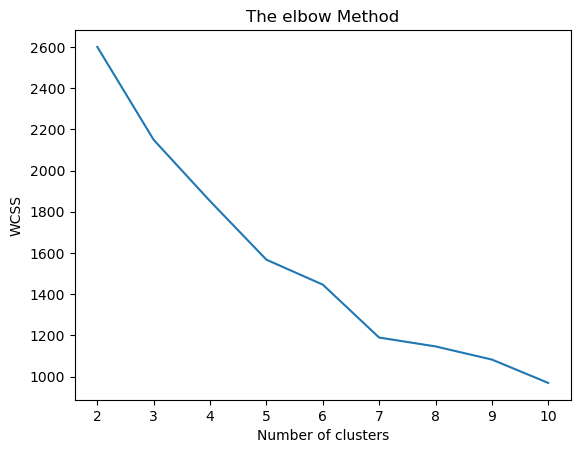

In [46]:
plt.plot(range(2,11),wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#fitting k-means to the datasets
model = KMeans(n_clusters = 5,random_state = 309)
groups = model.fit_predict(X)
print(groups)

[0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 3 0 0 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 0 0 0 4 0 0 2 2 0 0 2 2 4 0 2 2 0 4 0 0 2 4 2 0 2 2 2 3 2 0
 0 2 2 0 2 2 2 0 0 2 0 4 4 3 2 2 2 2 4 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 3 2 3 2
 2 2 2 0 0 2 2 2 0 2 2 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 4 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 4 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 0 1
 4 1 0 1 1 1 1 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 0 0 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


In [49]:
groups.shape

(440,)

In [50]:
group_num=pd.DataFrame(groups,columns=['Groups'])
group_num

,Groups
0,0
1,0
2,0
3,2
4,0
...,...
435,2
436,2
437,0
438,2


In [51]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,2


In [52]:
silhouette_score(X,groups)

0.3525137387598017

In [83]:
cust_kmeans_data[cust_kmeans_data['Groups']==4]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
47,2,3,44466,54259,55571,7782,24171,6465,4
56,2,3,4098,29892,26866,2616,17740,1340,4
61,2,3,35942,38369,59598,3254,26701,2017,4
65,2,3,85,20959,45828,36,24231,1423,4
85,2,3,16117,46197,92780,1026,40827,2944,4
86,2,3,22925,73498,32114,987,20070,903,4
92,2,3,9198,27472,32034,3232,18906,5130,4
211,2,1,12119,28326,39694,4736,19410,2870,4
251,2,1,6134,23133,33586,6746,18594,5121,4
333,2,2,8565,4980,67298,131,38102,1215,4


DBSCAN

In [85]:
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(eps=3.2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=3.2, min_samples=10)

In [95]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [111]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_cluster=pd.concat([df,cl],axis=1)

In [113]:
df_cluster[df_cluster['cluster']==-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,2,3,26373,36423,22019,5154,4337,16523,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1
93,1,3,11314,3090,2062,35009,71,2698,-1
181,1,3,112151,29627,18148,16745,4948,8550,-1
183,1,3,36847,43950,20170,36534,239,47943,-1


In [146]:
silhouette_score(X,dbscan.labels_)

0.6866475343140435